<a href="https://colab.research.google.com/github/WinnieAnyoso/Supervised_and-_unsupervised_ML_R/blob/master/PART_2_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load dataset
super <- read.csv("Supermarket_Dataset_1 - Sales Data.csv")
head(super)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [2]:
str(super)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

In [3]:
# DImension of the dataset
dim(super)


[1] 1000   16

In [4]:
# Change datatypes to the correct ones:

# To Numeric datatype
g = c('Branch', 'Gender','Customer.type', 'Product.line', 'Payment')
for (i in g){
    super[,i] = as.numeric(super[,i])
}

In [8]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
# Add a sales column
super <- super %>% mutate(Sales = Tax+Total)

In [10]:
# Dropping Unnecessary columns 
super = super[,c(-1,-9,-10)]
names(super)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Payment"                
 [9] "cogs"                    "gross.margin.percentage"
[11] "gross.income"            "Rating"                 
[13] "Total"                   "Sales"

Feature selection

In [11]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [13]:

# Loading the corrplot package for plotting
# ---
library(corrplot)
library(caret)

corrplot 0.84 loaded

Loading required package: lattice

Loading required package: ggplot2



In [16]:

# Remove columns with standard deviation of zero
super.num <- super[, sapply(super, is.numeric)]

super.num <- super.num[, !sapply(super.num, function(x) { sd(x) == 0} )]

In [18]:
correlationMatrix <- cor(super.num)

In [19]:
highCorr <- findCorrelation(correlationMatrix, cutoff=0.75)

In [22]:
highCorr
names(super.num[,highCorr])

[1]  9 12  7 10

[1] "cogs"         "Total"        "Tax"          "gross.income"

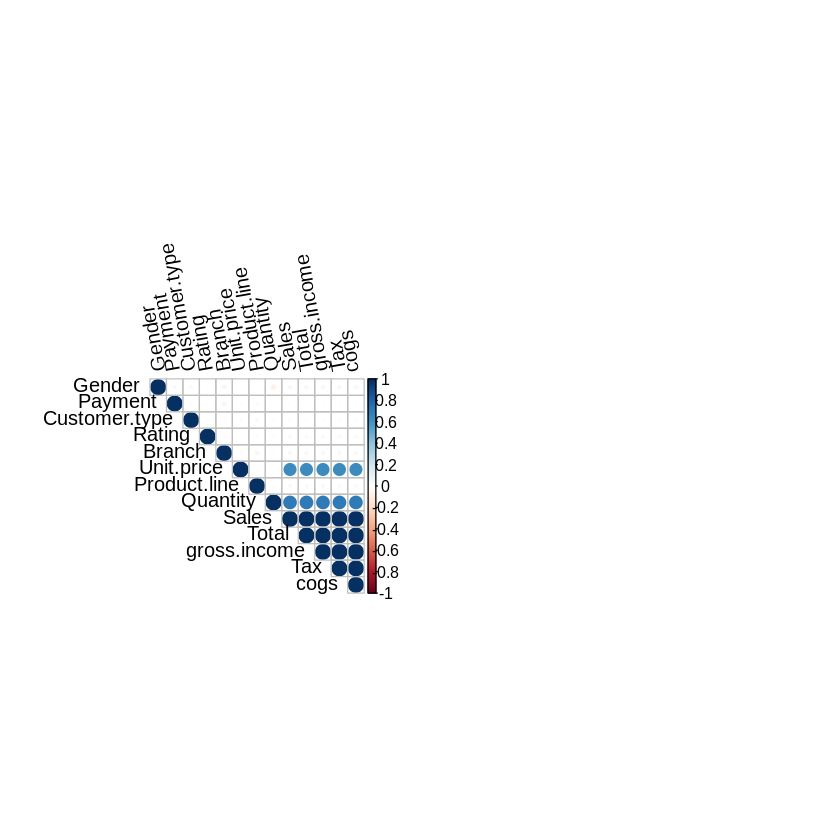

In [30]:
par(mfrow = c(1, 2))
corrplot(correlationMatrix,type = "upper", order = "hclust", tl.col = "black", tl.srt = 100)